Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Predicted Species: Iris-setosa


D:\Python\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


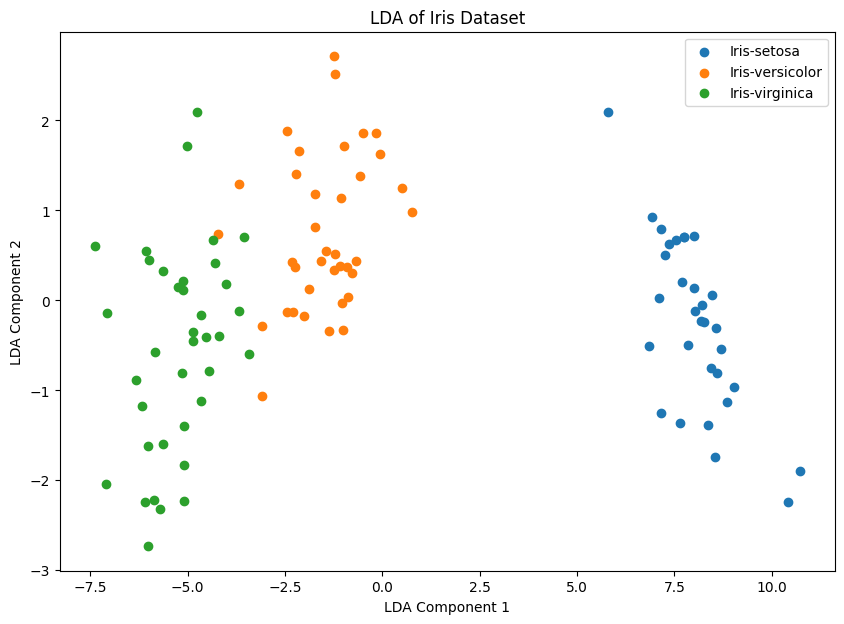

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = pd.read_csv("datasets/Iris.csv")
iris.drop(columns="Id", inplace=True)

x = iris.iloc[:, :-1]  # Features: sepal length, sepal width, petal length, petal width
y = iris.iloc[:, -1]  # Target: species (0 - Setosa, 1 - Versicolour, 2 - Virginica)

iris.sample(5)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

lda = LinearDiscriminantAnalysis()  # Reduce to 2 components for visualization
xtrain = lda.fit_transform(xtrain, ytrain)
xtest = lda.transform(xtest)

lda = LinearDiscriminantAnalysis()
lda.fit(xtrain, ytrain)
ypred = lda.predict(xtest)

print("Accuracy:", accuracy_score(ytest, ypred))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
print("Classification Report:\n", classification_report(ytest, ypred, target_names=y.unique()))

sample = pd.DataFrame([[5.1, 3.5]], columns=['PCA1','PCA2'])
predicted_species = lda.predict(sample)
print(f"Predicted Species: {predicted_species[0]}")

plt.figure(figsize=(10, 7))
for species in iris['Species'].unique():
    plt.scatter(xtrain[ytrain == species, 0], 
                xtrain[ytrain == species, 1], label=species)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of Iris Dataset')
plt.legend()
plt.show()